# Pathological Findings Classification (3 Classes)

### Download and extract the Dataset. Also remove unnecessary classes.

In [1]:
!mkdir kvasir
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/ERzdk7nD_aBEgnA0NS-DlzwBjM2v0jo8iH-laBgi1YOkEg?e=JMgQXd&download=1' -O kvasir-dataset-v2.zip
!unzip /content/kvasir-dataset-v2.zip
!mv /content/content/kvasir/kvasir-dataset-v2 /content/kvasir
!rm -r kvasir/kvasir-dataset-v2/dyed-resection-margins
!rm -r kvasir/kvasir-dataset-v2/dyed-lifted-polyps
!rm -r kvasir/kvasir-dataset-v2/normal-pylorus
!rm -r kvasir/kvasir-dataset-v2/normal-cecum
!rm -r kvasir/kvasir-dataset-v2/normal-z-line
!rm -r /content/content

Streaming output truncated to the last 5000 lines.
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/3b77b2f5-5a77-47b9-9475-477c26ec78d7.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/195f99c7-bd05-4189-86f3-89480d1d3913.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/1b03c9ad-70b6-484f-b342-8614d5062e34.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/140670b4-221e-4149-b748-f29940067147.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/13a62adb-0941-4df7-b788-aa733e244f4f.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/760dfee6-3715-456b-ad6b-48b17db59fdd.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/4128a5ff-df5d-4b3a-9560-bd131a13526a.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/a1e1c7f8-a30f-4b4f-9d62-3d356a864229.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/b5e24486-2569-4192-9

## Verify data directories

In [2]:
!ls kvasir/kvasir-dataset-v2

esophagitis  polyps  ulcerative-colitis


In [3]:
#import libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D

In [4]:
#dataset path

dataset_directory = "/content/kvasir/kvasir-dataset-v2"

## Creating Random Train and Validation Splits

In [ ]:
# train-test-splits
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                               labels="inferred",
                                                               image_size=(224, 224),
                                                               batch_size=16,
                                                               subset="training",
                                                               validation_split=0.222222222,
                                                               seed=123
                                                               )

validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                              labels="inferred",
                                                              image_size=(224, 224),
                                                              batch_size=16,
                                                              subset="validation",
                                                              validation_split=0.222222222,
                                                              seed=123
                                                              )

In [6]:
#classes labels

print(len(training_data.class_names), "Classes are:", training_data.class_names)

3 Classes are: ['esophagitis', 'polyps', 'ulcerative-colitis']


## Vizualizing

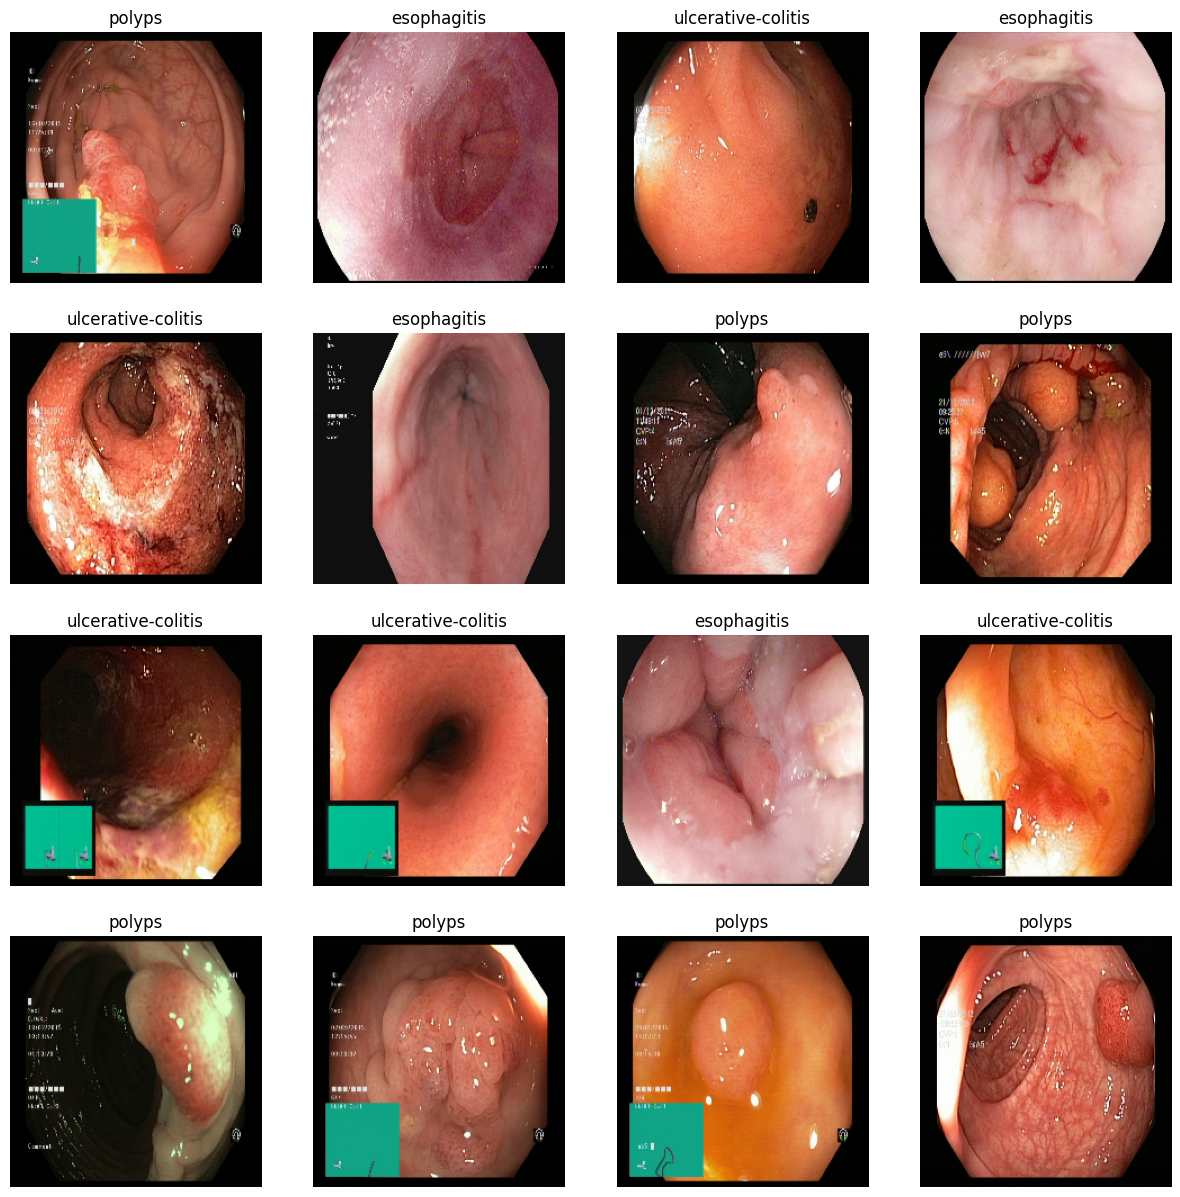

In [7]:
#image plot

plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(training_data.class_names[labels[i]])
    plt.axis('off')

In [8]:
training_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Architecture and Training

In [9]:
num_classes = len(training_data.class_names)

inputs = keras.Input(shape=(224, 224, 3))

x = keras.applications.vgg16.preprocess_input(inputs)

# Load pre-trained Xception model
base_model = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False

# Pass inputs through base model
x = base_model(x)

# Add pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dropout layer
x = keras.layers.Dropout(0.2)(x)

# Add dense output layer with softmax activation
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the model
model = keras.Model(inputs, outputs)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

epochs = 50

history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
132/132 [==============================] - 35s 207ms/step - loss: 1.2616 - accuracy: 0.7158 - val_loss: 0.1881 - val_accuracy: 0.9265
Epoch 2/50
132/132 [==============================] - 20s 142ms/step - loss: 0.3566 - accuracy: 0.8972 - val_loss: 0.1138 - val_accuracy: 0.9666
Epoch 3/50
132/132 [==============================] - 20s 141ms/step - loss: 0.2673 - accuracy: 0.9234 - val_loss: 0.0817 - val_accuracy: 0.9833
Epoch 4/50
132/132 [==============================] - 21s 153ms/step - loss: 0.1881 - accuracy: 0.9405 - val_loss: 0.0884 - val_accuracy: 0.9716
Epoch 5/50
132/132 [==============================] - 22s 158ms/step - loss: 0.1827 - accuracy: 0.9491 - val_loss: 0.0768 - val_accuracy: 0.9666
Epoch 6/50
132/132 [==============================] - 19s 140ms/step - loss: 0.1574 - accuracy: 0.9486 - val_loss: 0.0851 - val_accuracy: 0.9699
Epoch 7/50
132/132 [==============================] - 21s 149ms/s

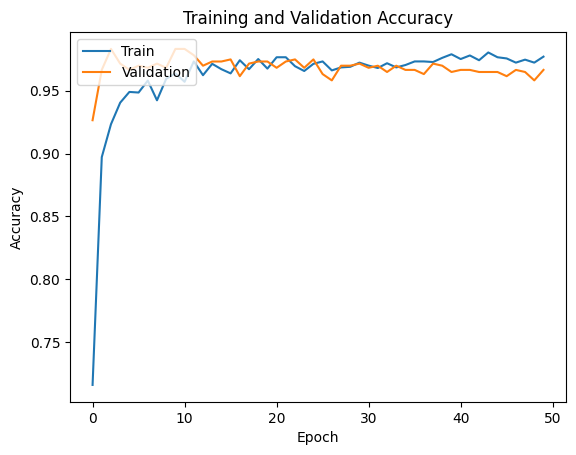

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
max_train_accuracy = max(history.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9804854989051819
Maximum Validation Accuracy: 0.9833055138587952


## Model Finetuning

In [12]:
#Fine tuning the entire model

#unfreeze the top layers
base_model.tainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=.00001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

history_ft = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = 20,
                    callbacks=[checkpoint])

Epoch 1/20
132/132 [==============================] - 22s 148ms/step - loss: 0.0534 - accuracy: 0.9819 - val_loss: 0.1090 - val_accuracy: 0.9633
Epoch 2/20
132/132 [==============================] - 19s 140ms/step - loss: 0.0505 - accuracy: 0.9791 - val_loss: 0.1095 - val_accuracy: 0.9633
Epoch 3/20
132/132 [==============================] - 21s 153ms/step - loss: 0.0446 - accuracy: 0.9838 - val_loss: 0.1104 - val_accuracy: 0.9649
Epoch 4/20
132/132 [==============================] - 20s 145ms/step - loss: 0.0531 - accuracy: 0.9781 - val_loss: 0.1101 - val_accuracy: 0.9633
Epoch 5/20
132/132 [==============================] - 19s 140ms/step - loss: 0.0568 - accuracy: 0.9786 - val_loss: 0.1102 - val_accuracy: 0.9633
Epoch 6/20
132/132 [==============================] - 21s 149ms/step - loss: 0.0492 - accuracy: 0.9819 - val_loss: 0.1102 - val_accuracy: 0.9616
Epoch 7/20
132/132 [==============================] - 19s 140ms/step - loss: 0.0544 - accuracy: 0.9814 - val_loss: 0.1107 - val_ac

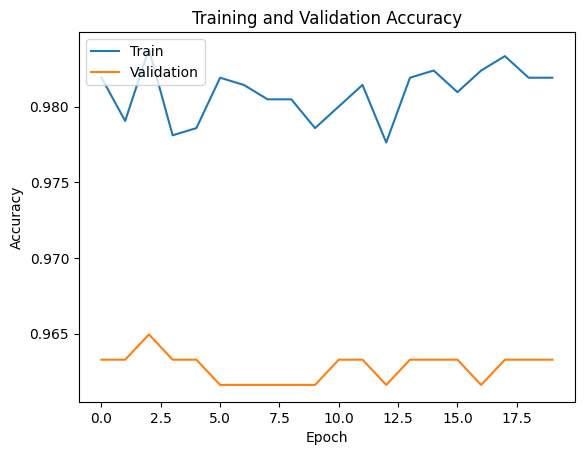

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing for Unseen Data.

In [14]:
# Load the model with the highest validation accuracy
best_model = model.load_weights('best_model.keras')

In [20]:
!mkdir kvasir-valid
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1' -O kvasir-validation-dataset.zip
!unzip /content/kvasir-validation-dataset.zip
!mv /content/content/kvasir-validation /content/kvasir-valid
!rm -r /content/kvasir-valid/kvasir-validation/dyed-resection-margins
!rm -r /content/kvasir-valid/kvasir-validation/dyed-lifted-polyps
!rm -r /content/kvasir-valid/kvasir-validation/normal-pylorus
!rm -r /content/kvasir-valid/kvasir-validation/normal-cecum
!rm -r /content/kvasir-valid/kvasir-validation/normal-z-line

--2024-01-05 16:44:27--  https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1
Resolving pern-my.sharepoint.com (pern-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2a01:111:f402:f0a5::27
Connecting to pern-my.sharepoint.com (pern-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1 [following]
--2024-01-05 16:44:27--  https://pern-my.sharepoint.com/personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1
Reusing existing connection to pern-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 245504250 (234M) [application/x-zip-compressed]
Saving to: ‘kvasir-validation-dataset.zip’

kvasir-validation-d 100%[===================

In [23]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/kvasir-valid2/kvasir-validation',
    image_size=(224, 224),
    batch_size=16,
    shuffle=False,
)

Found 300 files belonging to 3 classes.


In [24]:
# Extract true labels from the directory structure
true_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())

# Convert to numpy array
true_labels = np.array(true_labels)

# Make predictions using the model on the validation dataset
predictions = model.predict(validation_dataset)

# Ensure the number of samples matches
num_samples_predictions = len(predictions)
num_samples_true_labels = len(true_labels)

if num_samples_predictions != num_samples_true_labels:
    print(f"Error: Mismatch in the number of samples - Predictions: {num_samples_predictions}, True Labels: {num_samples_true_labels}")
else:
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score, classification_report

    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"\nAccuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

19/19 [==============================] - 5s 269ms/step

Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.92      0.95       100
           2       0.92      0.98      0.95       100

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [25]:
max_train_accuracy = max(history_ft.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history_ft.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9838172197341919
Maximum Validation Accuracy: 0.9649415612220764


In [26]:
print("Training accuracy list:", history.history['accuracy'])
print("Validation accuracy list:", history.history['val_accuracy'])

print("Training accuracy list (finetuned):", history_ft.history['accuracy'])
print("Validation accuracy list (finetuned):", history_ft.history['val_accuracy'])

Training accuracy list: [0.7158495783805847, 0.8971918225288391, 0.923369824886322, 0.9405045509338379, 0.9490718841552734, 0.9485958814620972, 0.9581151604652405, 0.9424083828926086, 0.9595430493354797, 0.9638267755508423, 0.9571632742881775, 0.9733460545539856, 0.962398886680603, 0.9714421629905701, 0.9671584963798523, 0.9638267755508423, 0.9742979407310486, 0.9671584963798523, 0.9752498865127563, 0.9676344394683838, 0.9766777753829956, 0.9766777753829956, 0.9695383310317993, 0.965730607509613, 0.9714421629905701, 0.9733460545539856, 0.9662065505981445, 0.9685863852500916, 0.969062328338623, 0.9723941087722778, 0.9700142741203308, 0.9681104421615601, 0.9719181060791016, 0.9685863852500916, 0.9704902172088623, 0.9733460545539856, 0.9733460545539856, 0.9728700518608093, 0.9762018322944641, 0.9790576100349426, 0.9752498865127563, 0.9781056642532349, 0.9742979407310486, 0.9804854989051819, 0.9766777753829956, 0.9757258296012878, 0.9723941087722778, 0.9747739434242249, 0.9723941087722778,